### Equipe:

Arthur Wanderley Ferreira dos Santos - awfs@cesar.school

Thiago Wanderley Amorim - twa@cesar.school

### **Redes Neurais Recorrentes (RNNs)**

As Redes Neurais Recorrentes (RNNs) são um tipo de rede neural projetada para processar sequências de dados, como séries temporais ou textos. A principal característica das RNNs é a capacidade de manter um estado interno que captura informações sobre as entradas anteriores, permitindo que a rede tenha "memória" dos passos anteriores na sequência.

A cada passo de tempo $t$, a RNN atualiza seu estado oculto $h_t$ com base na entrada atual $x_t$ e no estado oculto anterior $h_{t-1}$:

$$
h_t = \tanh(W_{ih} \cdot x_t + W_{hh} \cdot h_{t-1} + b_h)
$$

Aqui:
- $W_{ih}$ é a matriz de pesos que conecta a entrada ao estado oculto.
- $W_{hh}$ é a matriz de pesos que conecta o estado oculto anterior ao atual.
- $b_h$ é o termo de bias.
- $\tanh$ é a função de ativação que introduz não-linearidade.

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

### **Implementação de uma Célula RNN**

Nesta seção, implementaremos uma célula RNN personalizada usando o PyTorch. A célula RNN é a unidade básica de uma RNN, responsável por calcular o novo estado oculto com base na entrada atual e no estado oculto anterior.

#### **Explicação do Código**

O código a seguir define uma célula RNN personalizada:

- **Entrada:** O tamanho da entrada `input_size` e o tamanho do estado oculto `hidden_size`.
- **Pesos:** $ W_{ih} $ e $ W_{hh} $ são as matrizes de pesos, e $ b_h $ é o bias.
- **Saída:** A célula computa o novo estado oculto $ h_t $ a partir da entrada e do estado oculto anterior.

In [2]:
class RNNCell(nn.Module):
    def __init__(self, input_size, hidden_size):
        super().__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size

        self.W_ih = nn.Linear(input_size, hidden_size, bias=False) # Define a matriz de pesos de entrada
        self.W_hh = nn.Linear(hidden_size, hidden_size, bias=False) # Define a matriz de pesos de saída
        self.b_h = nn.Parameter(torch.zeros(hidden_size)) # Define o bias

    def forward(self, x, h):
        # x: (batch_size, input_size)
        # h: (batch_size, hidden_size)
        ht = torch.tanh(self.W_ih(x) + self.W_hh(h) + self.b_h)
        return ht

### **Exemplo de Uso da Célula RNN**

Inicialmente, definimos uma célula RNN com um tamanho de entrada de 10 e um tamanho de estado oculto de 4.

In [3]:
# Exemplo
input_size = 10
hidden_size = 4

rnn_cell = RNNCell(input_size, hidden_size)

### **Inspeção dos Parâmetros da Célula RNN**

Neste trecho de código, vamos inspecionar os parâmetros da célula RNN que acabamos de definir. Em uma rede neural, os parâmetros são os valores ajustáveis (como os pesos e bias) que a rede aprende durante o treinamento.

Ao executar o código, veremos os nomes e as formas dos parâmetros:

- **`W_ih`**: Matriz de pesos conectando a entrada ao estado oculto.
- **`W_hh`**: Matriz de pesos conectando o estado oculto anterior ao atual.
- **`b_h`**: Termo de bias para o estado oculto.

In [4]:
for name, param in rnn_cell.named_parameters():
    print(name, param.shape)

b_h torch.Size([4])
W_ih.weight torch.Size([4, 10])
W_hh.weight torch.Size([4, 4])


#### **Explicação do Código**

No exemplo abaixo:
- Inicializamos uma entrada $x$ aleatória e um estado oculto inicial $h$ como zero.
- A célula RNN processa a entrada e gera um novo estado oculto.

In [5]:
x = torch.randn(input_size)
h = torch.zeros(hidden_size)

hn = rnn_cell(x, h)

hn.shape

torch.Size([4])

### **Processamento de Sequências com RNN**

RNNs são projetadas para processar sequências de dados, onde cada passo de tempo depende dos passos anteriores. Vamos demonstrar isso processando uma sequência de entradas com a célula RNN.

#### **Explicação do Código**

Neste exemplo:
- Processamos uma sequência de 3 entradas $x$ e atualizamos o estado oculto $h$ a cada passo.
- O estado oculto é propagado ao longo da sequência, capturando informações temporais.

In [6]:
# Sequences
seq_len = 3

x = torch.randn(seq_len, input_size)
h = torch.zeros(hidden_size)

# Para cada instante de tempo
for i in range(seq_len):
    # Atualiza o estado oculto
    h = rnn_cell(x[i], h)
    print(f"Passo {i+1}")
    print(f"h = {h}")
    print()

Passo 1
h = tensor([-0.3711,  0.5443, -0.7287, -0.7739], grad_fn=<TanhBackward0>)

Passo 2
h = tensor([ 0.4059, -0.5623, -0.7170,  0.4634], grad_fn=<TanhBackward0>)

Passo 3
h = tensor([-0.1770,  0.1274, -0.5378, -0.7074], grad_fn=<TanhBackward0>)



### **Processamento de Sequências em Lote (Batched RNN)**

Para aumentar a eficiência, as RNNs podem processar várias sequências simultaneamente, usando o conceito de "batching". Cada sequência no lote é processada de forma independente, mas compartilhando os mesmos pesos da RNN.

#### **Explicação do Código**

Neste exemplo:
- Criamos um batch de 8 sequências, cada uma com 10 entradas.
- A célula RNN é aplicada ao batch, atualizando o estado oculto para cada sequência de forma paralela.

In [7]:
# Batched RNN
batch_size = 8

x = torch.randn(batch_size, input_size)
h = torch.zeros(batch_size, hidden_size)

hn = rnn_cell(x, h)

hn.shape

torch.Size([8, 4])

### **Processamento de Sequências em Lote com Múltiplos Passos de Tempo**

Aqui, processamos um batch de sequências ao longo de vários passos de tempo.

#### **Explicação do Código**

Neste exemplo:
- Processamos um lote de 8 sequências, cada uma com 3 passos de tempo.
- Em cada passo de tempo, a célula RNN atualiza o estado oculto para todas as sequências do lote.

In [8]:
# Sequences
seq_len = 3

x = torch.randn(batch_size, seq_len, input_size)
h = torch.zeros(batch_size, hidden_size)

# Para cada instante de tempo
for i in range(seq_len):
    # Atualiza o estado oculto
    h = rnn_cell(x[:, i], h)
    print(f"Passo {i}")
    print(f"h = {h.shape}")
    print()

Passo 0
h = torch.Size([8, 4])

Passo 1
h = torch.Size([8, 4])

Passo 2
h = torch.Size([8, 4])



### **Construção de uma Rede RNN Completa**

Vamos expandir a célula RNN que criamos anteriormente para uma rede RNN completa. A rede RNN será composta por uma célula RNN seguida por uma camada linear que produzirá a saída final.

#### **Explicação do Código**

- **`self.cell`**: Instância da célula RNN que processará cada passo da sequência.
- **`self.W_ho`**: Camada linear que mapeia o estado oculto final para a saída desejada.

No método `forward`:
- **Entrada (`x`)**: Um tensor de forma `(batch_size, seq_len, input_size)`, onde `seq_len` é o comprimento da sequência.
- **Estado oculto (`h`)**: Se não for fornecido, é inicializado como um vetor de zeros.
- **Processamento da sequência**: A entrada é processada passo a passo pela célula RNN.
- **Saída (`y`)**: Calculada pela camada linear a partir do estado oculto final.

In [9]:
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        self.cell = RNNCell(input_size, hidden_size) # Define a célula RNN
        self.W_ho = nn.Linear(hidden_size, output_size) # Define a matriz de pesos de saída

    def forward(self, x, h=None):
        # x: (batch_size, seq_len, input_size)
        batch_size, seq_len, _ = x.size()

        # h: (batch_size, hidden_size)
        if h is None:
            h = torch.zeros(batch_size, self.hidden_size)
        h = h.to(x.device)

        # Processa a sequência
        for i in range(seq_len):
            h = self.cell(x[:, i], h)

        # Calcula a saída
        y = self.W_ho(h)
        return y

### **Geração de Dados para Treinamento**

Para treinar a RNN, precisamos de um conjunto de dados sequenciais. Neste exemplo, geramos uma série temporal baseada em uma função senoide com ruído adicionado.

#### **Explicação do Código**

- **`x`**: Sequência de pontos no intervalo $[0, 6\pi]$.
- **`y`**: Valores da função senoide com ruído gaussiano adicionado.

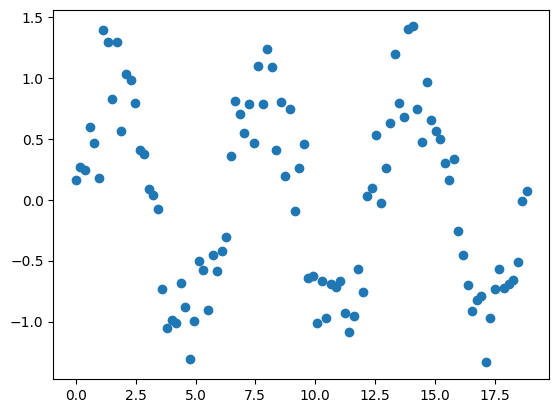

In [10]:
num_points = 100

x = np.linspace(0, 6*np.pi, num_points)
y = np.sin(x) + np.random.normal(0, 0.3, num_points)

plt.scatter(x, y)
plt.show()

### **Preparação das Sequências de Treinamento**

Agora, preparamos as entradas e as saídas alvo para o treinamento da RNN. Cada sequência de entrada será usada para prever o próximo ponto na série temporal.

#### **Explicação do Código**

- **`sequence_length`**: O comprimento da janela da sequência usada como entrada.
- **`inputs`**: Sequências de tamanho `sequence_length` extraídas dos dados.
- **`targets`**: O ponto subsequente na sequência que a rede deve prever.
- **Tensorização**: As sequências são convertidas em tensores PyTorch para uso na rede neural.

In [11]:
sequence_length = 20
batch_size = num_points - sequence_length
inputs = []
targets = []

for i in range(num_points - sequence_length):
    inputs.append(y[i:i+sequence_length])
    targets.append(y[i+sequence_length])

inputs = torch.tensor(inputs, dtype=torch.float32).unsqueeze(-1)  # Shape: (batch_size, window_size, 1)
targets = torch.tensor(targets, dtype=torch.float32).unsqueeze(-1)  # Shape: (batch_size, 1)

<ipython-input-11-a31d50ca37e9>:10: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  inputs = torch.tensor(inputs, dtype=torch.float32).unsqueeze(-1)  # Shape: (batch_size, window_size, 1)


### **Inicialização da Rede RNN e do Otimizador**

Nesta seção, instanciamos a rede RNN com os tamanhos de entrada, estado oculto, e saída definidos. Também configuramos o critério de perda e o otimizador.

#### **Explicação do Código**

- **`input_size`**: Dimensão da entrada (1, já que estamos lidando com uma série temporal univariada).
- **`hidden_size`**: Número de unidades no estado oculto.
- **`output_size`**: Dimensão da saída (1, pois queremos prever um único valor por vez).

In [12]:
input_size = 1
hidden_size = 8
output_size = 1

rnn = RNN(input_size, hidden_size, output_size)

In [13]:
criterion = nn.MSELoss()
optimizer = optim.Adam(rnn.parameters(), lr=0.01)

In [14]:
# Treinamento
num_epochs = 500
for epoch in range(num_epochs):
    optimizer.zero_grad()

    predictions = rnn(inputs)
    loss = criterion(predictions, targets)
    loss.backward()
    optimizer.step()

    if epoch % 50 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

Epoch 0, Loss: 0.3678688406944275
Epoch 50, Loss: 0.0798797607421875
Epoch 100, Loss: 0.06693682819604874
Epoch 150, Loss: 0.06336759030818939
Epoch 200, Loss: 0.06161639094352722
Epoch 250, Loss: 0.056580763310194016
Epoch 300, Loss: 0.054623793810606
Epoch 350, Loss: 0.045281924307346344
Epoch 400, Loss: 0.04238157346844673
Epoch 450, Loss: 0.036716047674417496


### **Geração de Predições com a Rede Treinada**

Após o treinamento, usamos a RNN para gerar previsões de uma nova série temporal. A ideia é prever a continuação da senoide a partir de uma sequência inicial.

#### **Explicação do Código**

- **`predicted_wave`**: Lista para armazenar as predições feitas pela RNN.
- **`input_seq`**: Sequência inicial usada para começar a predição.
- **Passos de predição**:
  - A cada passo, a rede faz uma nova predição que é adicionada à sequência de entrada.
  - A janela de entrada é atualizada para incluir a nova predição e excluir o ponto mais antigo.

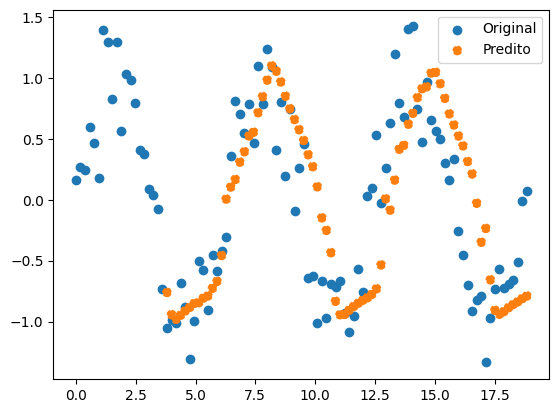

In [15]:
# Gerando predições para uma senoide
predicted_wave = []

input_seq = y[:sequence_length].reshape(1, sequence_length, 1)
input_seq = torch.tensor(input_seq, dtype=torch.float32)

for _ in range(num_points - sequence_length):
    predicted_next = rnn(input_seq)
    predicted_wave.append(predicted_next.item())

    # Arrasta a janela de entrada
    predicted_next = predicted_next.view(1, 1, 1)  # Reshape para (1, 1, 1)
    input_seq = torch.cat([input_seq[:, 1:, :], predicted_next], dim=1) # Remove o primeiro elemento e adiciona a predição

# Plota a senoide original e a predição
plt.scatter(x, y, label='Original')
plt.scatter(x[sequence_length:], predicted_wave, label='Predito', linestyle='dashed')
plt.legend()
plt.show()

## **Exercícios**

### **Exercício 1: Aumentando o Tamanho do Estado Oculto**

1. Aumente o tamanho do estado oculto (`hidden_size`) na rede RNN.
2. Treine a rede novamente com os mesmos dados de entrada.
3. Compare a perda final e as predições da rede com o modelo original.
4. Pergunta: Como o aumento do tamanho do estado oculto afetou o desempenho da rede?

### **Exercício 2: Predição de Longo Prazo**

1. Use a RNN treinada para prever 100 pontos futuros da senoide a partir de uma nova sequência inicial de 20 pontos.
2. Aumente o número de camadas ocultas e tente novamente.
2. Compare as predições com a senoide original.
3. Pergunta: A rede consegue manter a forma da senoide por um longo período de predição? O que acontece com as predições ao longo do tempo?

### **Exercício 3: Adicionando Ruído**

1. Adicione um ruído gaussiano mais forte à série temporal original (aumente a variância do ruído).
2. Treine a RNN com essa série temporal ruidosa.
3. Compare as predições com o modelo treinado com menos ruído.
4. Pergunta: Como o aumento do ruído nos dados de entrada impacta a capacidade da RNN de prever corretamente a série temporal?

Exercício 1:

In [16]:
input_size = 1
hidden_size = 20
output_size = 1

rnn1 = RNN(input_size, hidden_size, output_size)

In [17]:
criterion = nn.MSELoss()
optimizer = optim.Adam(rnn1.parameters(), lr=0.01)

In [19]:
# Treinamento
num_epochs = 500
for epoch in range(num_epochs):
    optimizer.zero_grad()

    predictions = rnn1(inputs)
    loss = criterion(predictions, targets)
    loss.backward()
    optimizer.step()

    if epoch % 50 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

Epoch 0, Loss: 0.4776638150215149
Epoch 50, Loss: 0.0655251294374466
Epoch 100, Loss: 0.048306990414857864
Epoch 150, Loss: 0.029918253421783447
Epoch 200, Loss: 0.014365091919898987
Epoch 250, Loss: 0.0079656932502985
Epoch 300, Loss: 0.011082193814218044
Epoch 350, Loss: 0.0024492600932717323
Epoch 400, Loss: 0.004303190391510725
Epoch 450, Loss: 0.0011945113074034452


Com o aumento do tamanho do estado oculto houve a diminuição do erro.

Exercício 2:

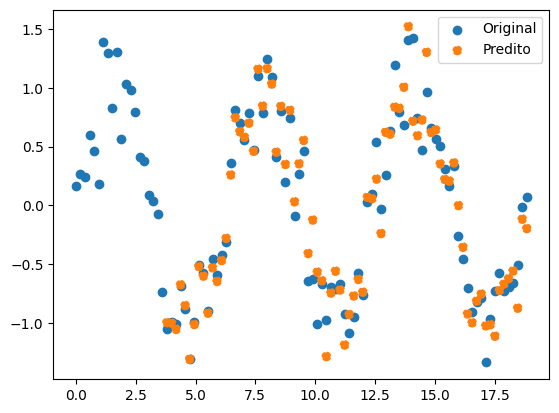

In [22]:
# Gerando predições para uma senoide
predicted_wave = []

input_seq = y[:sequence_length].reshape(1, sequence_length, 1)
input_seq = torch.tensor(input_seq, dtype=torch.float32)

for _ in range(num_points - sequence_length):
    predicted_next = rnn1(input_seq)
    predicted_wave.append(predicted_next.item())

    # Arrasta a janela de entrada
    predicted_next = predicted_next.view(1, 1, 1)  # Reshape para (1, 1, 1)
    input_seq = torch.cat([input_seq[:, 1:, :], predicted_next], dim=1) # Remove o primeiro elemento e adiciona a predição

# Plota a senoide original e a predição
plt.scatter(x, y, label='Original')
plt.scatter(x[sequence_length:], predicted_wave, label='Predito', linestyle='dashed')
plt.legend()
plt.show()

Exercício 3:

In [29]:
num_points = 100

x = np.linspace(0, 6*np.pi, num_points)
#Aumento do Ruído
y = np.sin(x) + np.random.normal(0, 1, num_points)

In [30]:
sequence_length = 20
batch_size = num_points - sequence_length
inputs = []
targets = []

for i in range(num_points - sequence_length):
    inputs.append(y[i:i+sequence_length])
    targets.append(y[i+sequence_length])

inputs = torch.tensor(inputs, dtype=torch.float32).unsqueeze(-1)
targets = torch.tensor(targets, dtype=torch.float32).unsqueeze(-1)

In [31]:
input_size = 1
hidden_size = 8
output_size = 1

rnn = RNN(input_size, hidden_size, output_size)

In [32]:
criterion = nn.MSELoss()
optimizer = optim.Adam(rnn.parameters(), lr=0.01)

In [33]:
# Treinamento
num_epochs = 500
for epoch in range(num_epochs):
    optimizer.zero_grad()

    predictions = rnn(inputs)
    loss = criterion(predictions, targets)
    loss.backward()
    optimizer.step()

    if epoch % 50 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

Epoch 0, Loss: 1.6213600635528564
Epoch 50, Loss: 1.091139316558838
Epoch 100, Loss: 0.7388690710067749
Epoch 150, Loss: 0.4927811026573181
Epoch 200, Loss: 0.40364885330200195
Epoch 250, Loss: 0.3330545425415039
Epoch 300, Loss: 0.28718507289886475
Epoch 350, Loss: 0.24386008083820343
Epoch 400, Loss: 0.21856169402599335
Epoch 450, Loss: 0.21363461017608643


Em comparação do ruído 0.3 e 1, com o aumento do ruído houve uma diminuição das perdas.